2 class classification neural network with a single hidden layer

In [346]:
#importing required libraries and utils
import numpy as np
import matplotlib.pyplot as plt
from planar_utils import *
#planar utils have 4 functions
#   plot_decision_boundary
#   sigmoid
#   load_planar_dataset
#   load_extra_datasets
from testCases_v2 import *

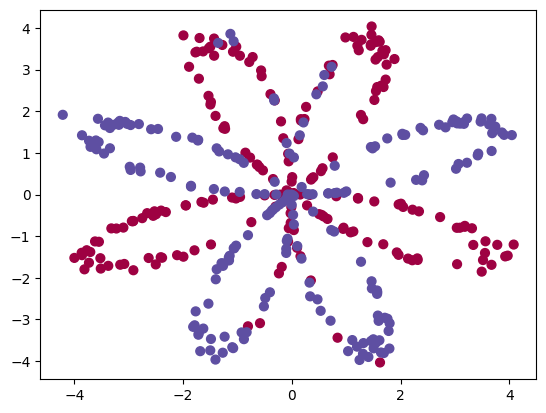

In [347]:
#loading dataset
X, Y = load_planar_dataset()
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
#X have coordinates (x1, x2) and Y have colors related to it

In [348]:
shapeX = X.shape
shapeY = Y.shape
m = X.shape[1]
print(f"Shape X: {shapeX}")
print(f"Shape Y: {shapeY}")
print(f"Number of training examples: {m}")

Shape X: (2, 400)
Shape Y: (1, 400)
Number of training examples: 400


In [349]:
# Neural Network Model
#     Size for
#         Input Layer     2
#         Hidden Layer    4
#         Output Layer    1
#     Activation FUnction 
#         Hidden Layer    tanh
#         Output Layer    sigmoid
# Steps to follow
#     1.  Define the neural network structure (# of input units, # of hidden units etc.)
#     2.  Initialize the model's parameters
#     3.  Loop: 
#             Implement forward propagation
#             Computer Loss
#             Implement back propagation
#             Update Parameters (gradient descent)
#     4.  Integrate all these in one function called "nnModel"

In [350]:
#return size for each layer of the network
def layer_sizes(X, Y):
    nX = X.shape[0]
    nH = 4
    nY = Y.shape[0]
    return nX, nH, nY

In [351]:
#initialize w1, b1, w2, b2 and return it in a dictionary
def initializeParameters(nX, nH, nY):
    np.random.seed(2)
    w1 = np.random.randn(nH, nX) * 0.01
    b1 = np.zeros((nH, 1))
    w2 = np.random.randn(nY, nH) * 0.01
    b2 = np.zeros((nY, 1))
    parameters = {
        "w1": w1,
        "b1": b1,
        "w2": w2,
        "b2": b2
    }
    return parameters

In [352]:
def forwardProp(X, parameters):
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]
    
    z1 = w1.dot(X) + b1
    a1 = np.tanh(z1)
    z2 = w2.dot(a1) + b2
    a2 = sigmoid(z2)

    cache = {
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "a2": a2
    }

    return a2, cache

In [353]:
def computeCost(a2, Y):
    m = Y.shape[1]
    cost = Y.dot(np.log(a2.T)) + (1-Y).dot(np.log((1-a2).T))
    cost = float(np.squeeze(cost))
    cost /= -m
    return cost


In [354]:
def tanhDerivative(A):
    return 1-np.square(A)

In [355]:
def backwardProp(parameters, cache, X, Y):
    w1 = parameters["w1"]
    b1 = parameters["b1"]
    w2 = parameters["w2"]
    b2 = parameters["b2"]

    z1 = cache["z1"]
    a1 = cache["a1"]
    z2 = cache["z2"]
    a2 = cache["a2"]
    
    m = X.shape[1]

    dz2 = a2 - Y
    dw2 = 1/m * dz2.dot(a1.T)
    db2 = 1/m * np.sum(dz2, axis=1, keepdims=True)
    dz1 = w2.T.dot(dz2) * (1 - np.power(a1, 2))
    dw1 = 1/m * dz1.dot(X.T)
    db1 = 1/m * np.sum(dz1, axis=1, keepdims=True)

    grads = {
        "dw1": dw1,
        "db1": db1,
        "dw2": dw2,
        "db2": db2
    }

    return grads

In [356]:
def updateParams(parameters, grads, learningRate):
    parameters["w1"] -= learningRate * grads["dw1"]
    parameters["b1"] -= learningRate * grads["db1"]
    parameters["w2"] -= learningRate * grads["dw2"]
    parameters["b2"] -= learningRate * grads["db2"]
    return parameters

In [380]:
def nnModel(X, Y, nH, learningRate, numIterations, printCost=False):
    nX = X.shape[0]
    nY = Y.shape[0]
    
    parameters = initializeParameters(nX, nH, nY)

    costs = []
    for i in range(numIterations):
        a2, cache = forwardProp(X, parameters)
        cost = computeCost(a2, Y)
        grads = backwardProp(parameters, cache, X, Y)
        parameters = updateParams(parameters, grads, learningRate)

        costs.append(cost)
        if printCost and i%1000==0:
            print(f"Cost after {i} iterations: {cost}")
    
    return parameters       
    

In [366]:
def predict(parameters, X):
    a2, cache = forwardProp(X, parameters)
    predictions = (a2>0.5)
    return predictions

Cost after 0 iterations: 0.6930480201239824
Cost after 1000 iterations: 0.28808329356901846
Cost after 2000 iterations: 0.25438549407324546
Cost after 3000 iterations: 0.23386415038952205
Cost after 4000 iterations: 0.2267924874485401
Cost after 5000 iterations: 0.22264427549299015
Cost after 6000 iterations: 0.21973140404281316
Cost after 7000 iterations: 0.21750365405131297
Cost after 8000 iterations: 0.2194036752415432
Cost after 9000 iterations: 0.21854363755208112


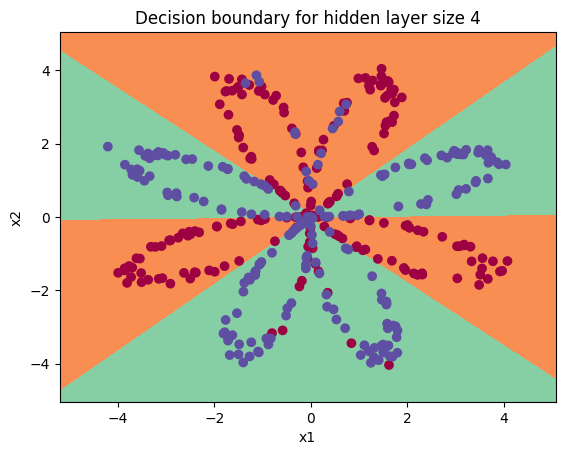

In [389]:
#running our Neural Network
parameters = nnModel(X, Y, 4, 1.2, numIterations=10000, printCost = True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision boundary for hidden layer size 4")
plt.show()

In [390]:
predictions = predict(parameters, X)
print(f"Accuracy: {float(np.squeeze((Y.dot(predictions.T) + (1-Y).dot(1-predictions.T))/float(Y.size)*100))}")

Accuracy: 90.75


Accuracy for 1 hidden units: 67.5 %
Accuracy for 2 hidden units: 67.25 %
Accuracy for 3 hidden units: 90.75 %
Accuracy for 4 hidden units: 90.5 %
Accuracy for 5 hidden units: 91.25 %
Accuracy for 10 hidden units: 90.25 %
Accuracy for 20 hidden units: 90.5 %
Accuracy for 50 hidden units: 90.25 %
Accuracy for 100 hidden units: 90.75 %
Accuracy for 500 hidden units: 90.75 %


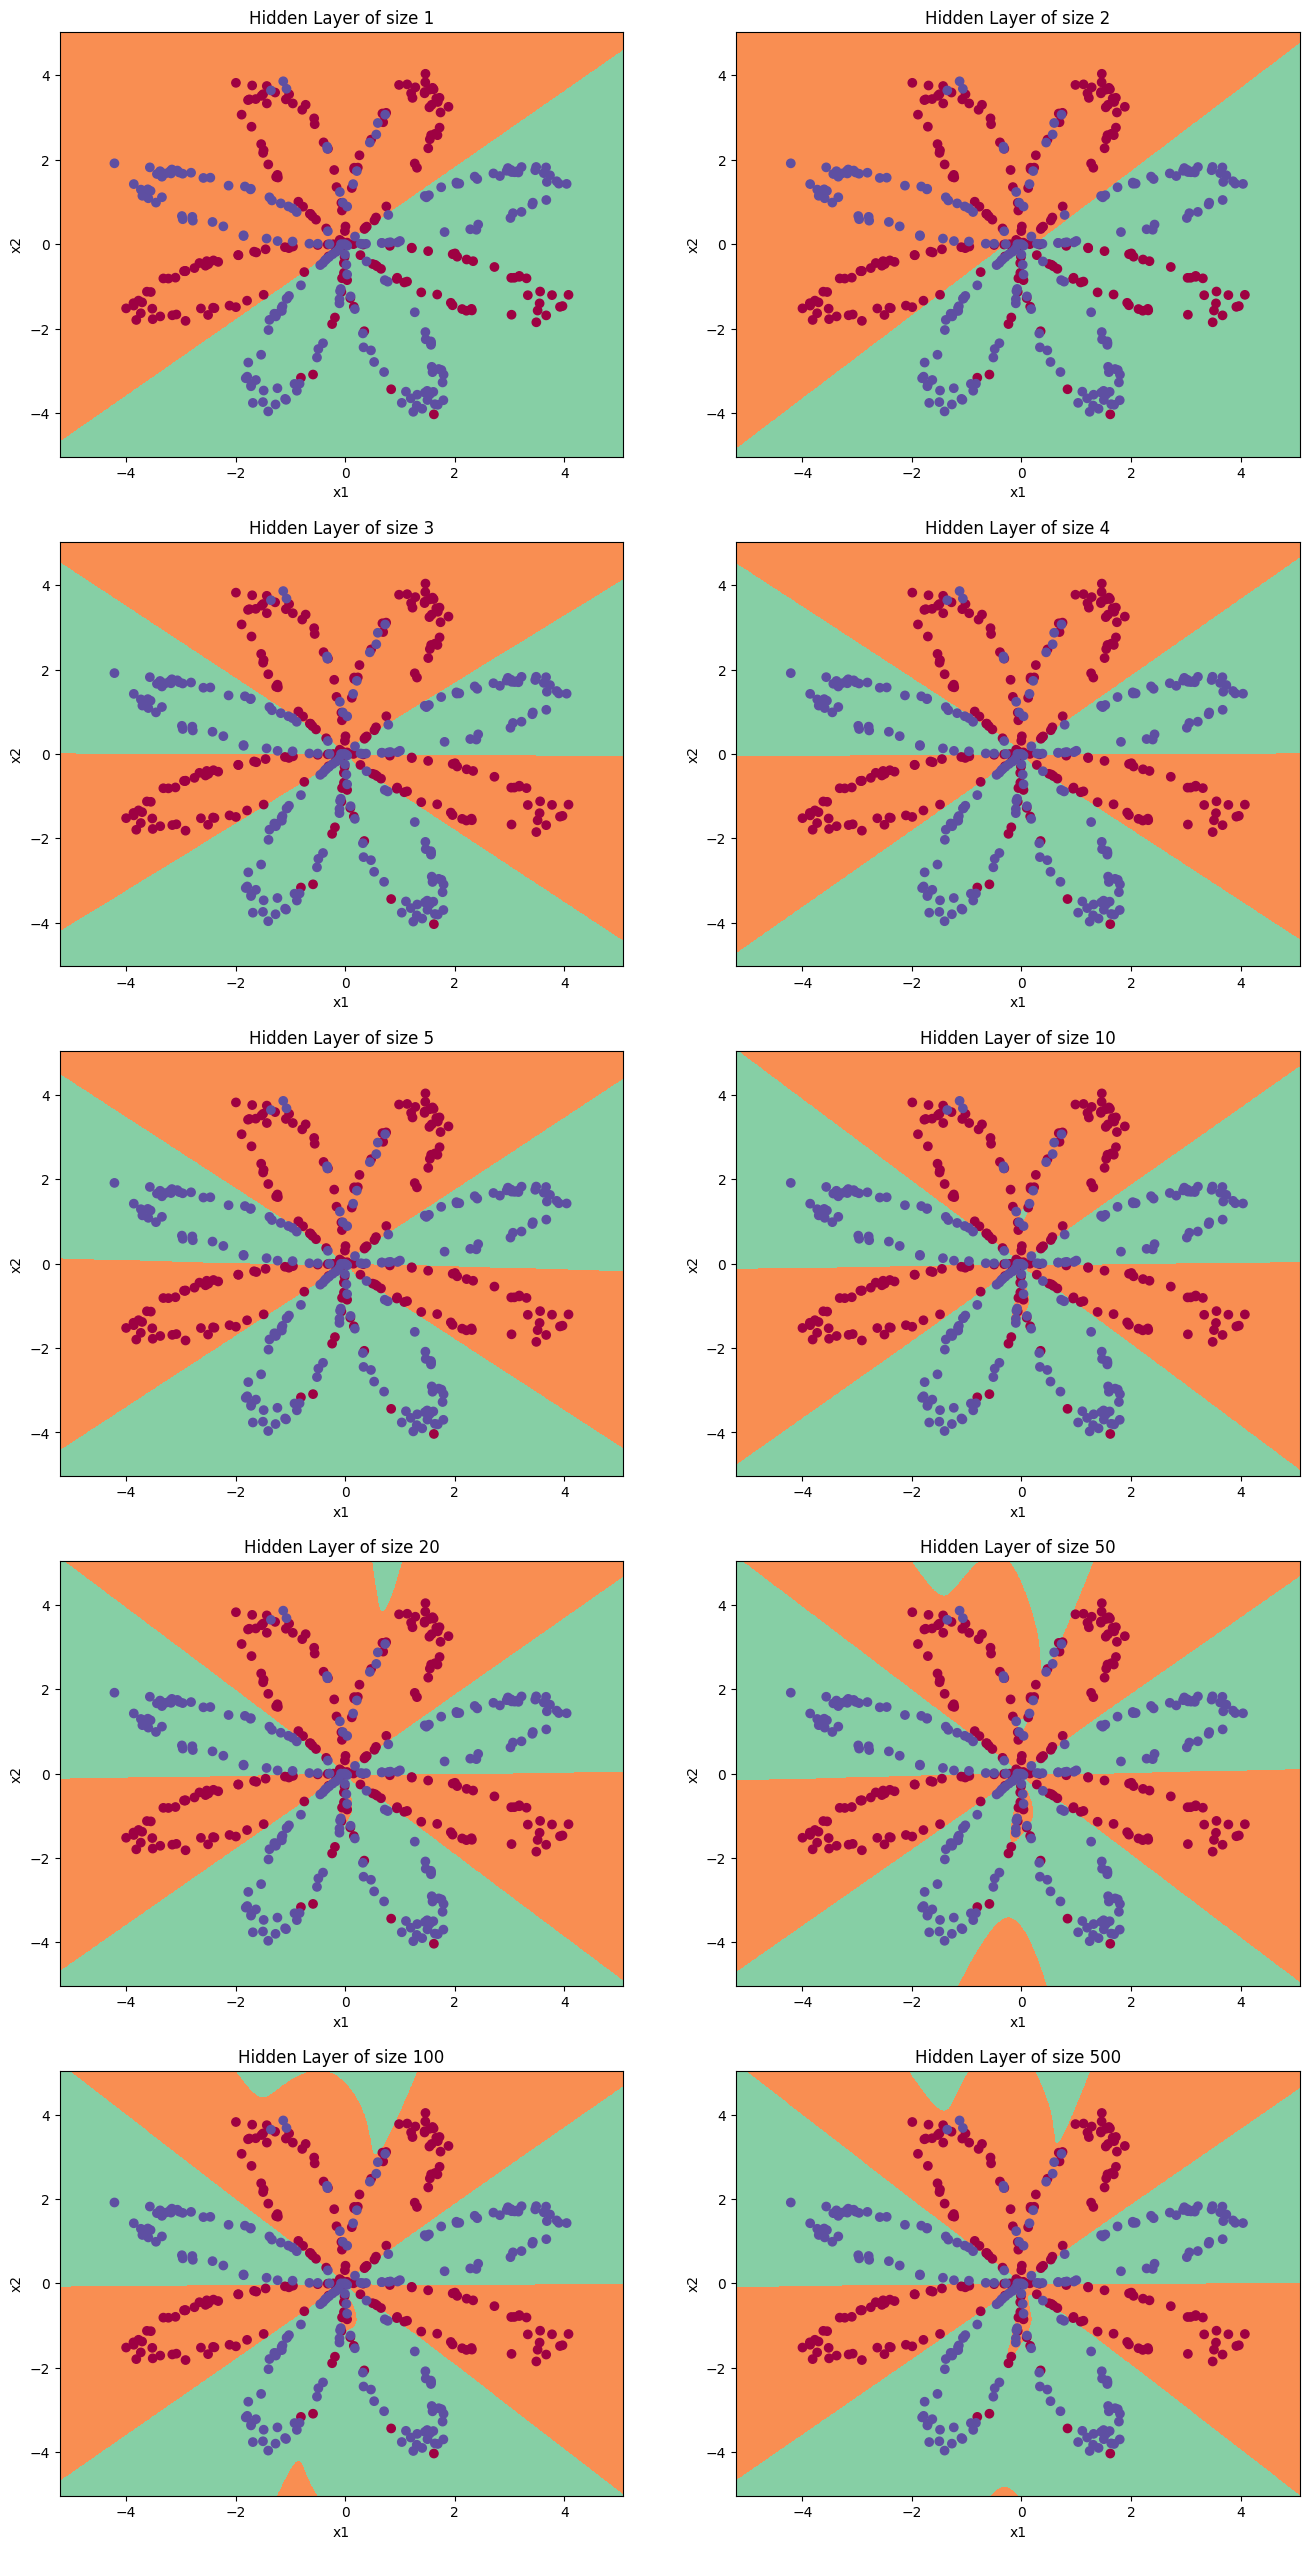

In [391]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 10, 20, 50, 100, 500]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nnModel(X, Y, n_h,1.2, numIterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float(np.squeeze((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100))
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))